In [1]:
import numpy as np
import cv2

In [10]:
import os
from os.path import join as pjoin

def useMaskImage(mask, img):
    alpha = 0.7
    maskProc = cv2.cvtColor(cv2.Canny(mask, 10, 200), cv2.COLOR_GRAY2BGR)
    maskProc[np.where((maskProc!=[0, 0, 0]).all(axis=2))] = [0, 0, 255]
    maskProc = cv2.dilate(maskProc, np.ones((3,3)), iterations=3)
    return cv2.addWeighted(img, alpha, maskProc, 1-alpha, 0)

imagesFolder = "nails/images"
masksFolder  = "nails/labels"

maskedImages = []

for name in os.listdir(imagesFolder):
    if (os.path.isfile(name)):
        continue
    image = cv2.imread(pjoin(imagesFolder, name))
    mask  = cv2.imread(pjoin(masksFolder, name))
    maskedImages.append(useMaskImage(mask, image))

pictureToShow = 0
while True:
    imagetoShow = cv2.putText(maskedImages[pictureToShow],'A/D - switch image', (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 123, 255), 2)
    cv2.imshow("Task", imagetoShow)
    key = cv2.waitKey(0) & 0xff
    if key == ord('a') or key == ord('A'):
        pictureToShow = (pictureToShow - 1) % len(maskedImages)
    if key == ord('d') or key == ord('D'):
        pictureToShow = (pictureToShow + 1) % len(maskedImages)
    if key == ord('Q') or key == ord('q') or key == 27:
        break


cv2.destroyAllWindows()


In [11]:
import time
cap = cv2.VideoCapture("Coffin Dance (Official Music Video HD).mp4")
FPS = 30
targetDelay = 1000/FPS
while True:
    Q_st = time.time()
    ret, frame = cap.read()
    cv2.imshow('ORIGINAL', cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    Q_end = time.time()
    timePerFrame = Q_end - Q_st
    delay = targetDelay - timePerFrame*1000
    if delay < 0: delay = 1
    key = cv2.waitKey(int(delay)) & 0xff
    if key == 27 or not ret or key == ord('Q') or key == ord('q'):
        break
    print(f"FPS {1/(time.time() - Q_st)}", end="\r")

cv2.destroyAllWindows()


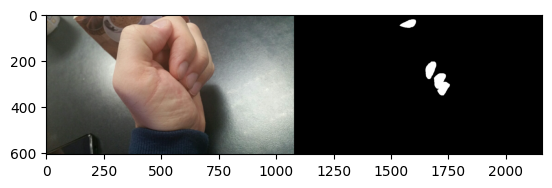

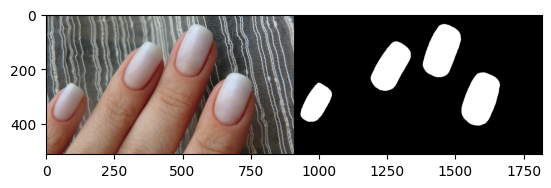

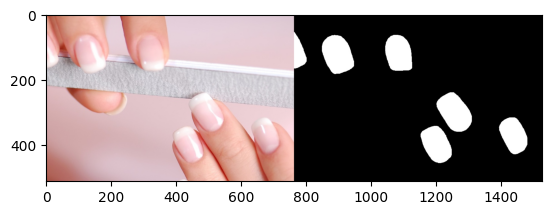

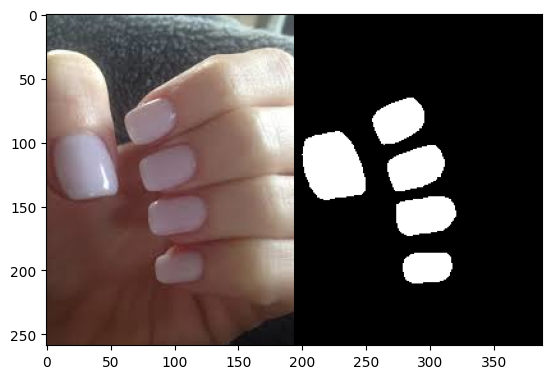

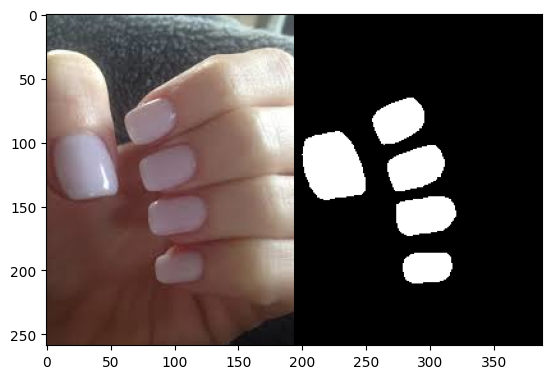

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder = os.listdir('nails/images')
list = []
for i in folder:
    imag = cv2.imread('nails/' + 'images/' + i)
    imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
    mask = cv2.imread('nails/' + 'labels/' + i)
    list.append([imag, mask])

def generator(number):

    for i in range(0, number):
        np.random.shuffle(list)
        res = np.concatenate((list[0][0], list[0][1]), axis=1)
        plt.imshow(res)
        plt.show()
        i -= 1

num = 5
generator(num)


cv2.destroyAllWindows()